### 2021_09_27_5 6

In [2]:
import seaborn as sns
import pandas as pd

In [4]:
train = pd.read_csv("./CSV/titanic/train.csv")
test = pd.read_csv("./CSV/titanic/test.csv")

print("train shape :", train.shape)
print("test shape :", test.shape)

train shape : (891, 12)
test shape : (418, 11)


## 데이터 프레임 확인
* [ ].info()
* [ ].dtypes
* [ ].columns
* [ ].shape
* [ ].describe()
* [ ].describe(include = ['O']) : 범주형 데이터

In [6]:
train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Group별 통계
    * groupby()

### Pclass별 Survived 확인

In [9]:
train.groupby(["Pclass"]).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [12]:
train[["Pclass", "Survived"]].groupby(["Pclass"]).count()

,Survived
Pclass,
1,216
2,184
3,491


### SibSp별 생존자 확인(groupby)

In [10]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [11]:
train.groupby(["SibSp"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,606
1,209,209,209,209,209,183,209,209,209,69,209
2,28,28,28,28,28,25,28,28,28,6,28
3,16,16,16,16,16,12,16,16,16,3,16
4,18,18,18,18,18,18,18,18,18,0,18
5,5,5,5,5,5,5,5,5,5,0,5
8,7,7,7,7,7,0,7,7,7,0,7


In [16]:
train[["SibSp", "Survived"]].groupby(["SibSp"]).count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


### SibSp별 Age의 평균 확인(groupby)

In [14]:
train[["SibSp", "Age"]].groupby(["SibSp"]).mean()

,Age
SibSp,
0,31.397558
1,30.089727
2,22.620000
3,13.916667
4,7.055556
5,10.200000
8,NaN


In [17]:
train.groupby(["SibSp"]).mean()["Age"]

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

### Pclass별 나이 연령대

In [22]:
train[["Pclass", "Age"]].groupby(["Pclass"]).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


### Pclass, Sex 별 데이터 확인

In [23]:
train.groupby(["Pclass", "Sex"]).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female           94        94    94   85     94     94      94    94   
       male            122       122   122  101    122    122     122   122   
2      female           76        76    76   74     76     76      76    76   
       male            108       108   108   99    108    108     108   108   
3      female          144       144   144  102    144    144     144   144   
       male            347       347   347  253    347    347     347   347   

               Cabin  Embarked  
Pclass Sex                      
1      female     81        92  
       male       95       122  
2      female     10        76  
       male        6       108  
3      female      6       144  
       male        6       347

### Pclass, Sex, Embarked 별 데이터 확인

In [24]:
train.groupby(["Pclass", "Sex", "Embarked"]).count()

PassengerId  Survived  Name  Age  SibSp  Parch  \
Pclass Sex    Embarked                                                   
1      female C                  43        43    43   38     43     43   
              Q                   1         1     1    1      1      1   
              S                  48        48    48   44     48     48   
       male   C                  42        42    42   36     42     42   
              Q                   1         1     1    1      1      1   
              S                  79        79    79   64     79     79   
2      female C                   7         7     7    7      7      7   
              Q                   2         2     2    1      2      2   
              S                  67        67    67   66     67     67   
       male   C                  10        10    10    8     10     10   
              Q                   1         1     1    1      1      1   
              S                  97        97    97   90     97     97   
3      female C                  23        23    23   16     23     23   
              Q                  33        33    33   10     33     33   
              S                  88        88    88   76     88     88   
       male   C                  43        43    43   25     43     43   
              Q                  39        39    39   14     39     39   
              S                 265       265   265  214    265    265   

                        Ticket  Fare  Cabin  
Pclass Sex    Embarked                       
1      female C             43    43     35  
              Q              1     1      1  
              S             48    48     43  
       male   C             42    42     31  
              Q              1     1      1  
              S             79    79     63  
2      female C              7     7      1  
              Q              2     2      1  
              S             67    67      8  
       male   C             10    10      1  
              Q              1     1      0  
              S             97    97      5  
3      female C             23    23      1  
              Q             33    33      0  
              S             88    88      5  
       male   C             43    43      0  
              Q             39    39      1  
              S            265   265      5

### Pclass, Sex, Embarked, Parch 별 평균 확인
    * as_index = False : 값 한 줄씩 표시

In [37]:
train.groupby(["Pclass", "Sex", "Embarked", "Parch"], as_index = False).mean()

,Pclass,Sex,Embarked,Parch,PassengerId,Survived,Age,SibSp,Fare
0,1,female,C,0,389.363636,0.969697,36.607143,0.454545,109.791036
1,1,female,C,1,538.857143,1.000000,40.571429,0.428571,110.739871
2,1,female,C,2,531.666667,1.000000,20.333333,1.333333,191.416667
3,1,female,Q,0,413.000000,1.000000,33.000000,1.000000,90.000000
4,1,female,S,0,512.428571,1.000000,34.960000,0.535714,79.510118
5,1,female,S,1,622.600000,1.000000,37.444444,0.400000,111.610840
6,1,female,S,2,401.100000,0.800000,22.800000,1.000000,141.090000
7,1,male,C,0,483.677419,0.419355,39.880000,0.258065,75.049465
8,1,male,C,1,333.625000,0.375000,43.125000,0.250000,145.793750
9,1,male,C,2,529.666667,0.333333,34.000000,0.000000,145.219433


In [40]:
dat = train.groupby(["Pclass", "Sex"], as_index = False).mean()

### 값 정렬
    * sort_values()

In [41]:
dat.sort_values(by = "Survived", ascending = False)

,Pclass,Sex,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,female,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
2,2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
4,3,female,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
1,1,male,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
3,2,male,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
5,3,male,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


In [42]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### FacetGrid.map()
* FacetGrid.map(self, func, args, *kwargs)
    * func : A plotting function
    * *args : 데이터의 열이름
    * **kwargs : 전달되는 인수

In [43]:
import matplotlib.pyplot as plt

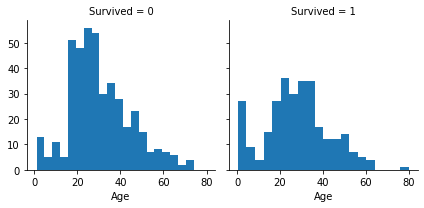

In [44]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<Figure size 1080x1080 with 0 Axes>

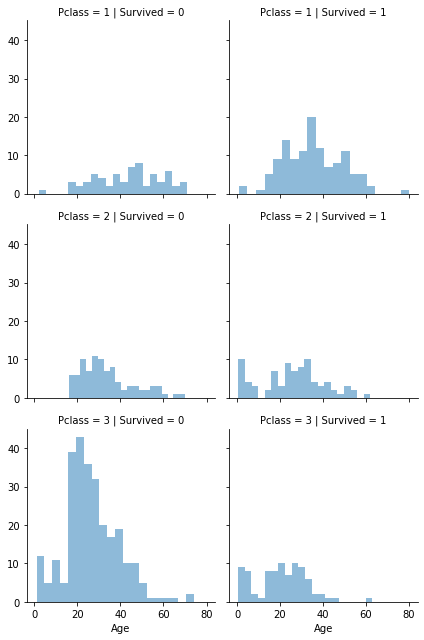

In [45]:
plt.figure(figsize=(15,15))
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)

In [46]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 데이터 프레임 값 삭제
* train.drop([], axis = 1) : axis : 0 - 행, 1 - 열

### 데이터 전처리
    * Ticket, Cabin 열 삭제하기 - drop()

In [50]:
train.drop(["Ticket", "Cabin"], axis = 1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [49]:
train_df = train.drop(["Ticket", "Cabin"], axis = 1)
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


### 데이터 프레임 확인
* [ ].shape
* [ ].head()
* [ ].tail()
* [ ].describe()
* [ ].columns
* [ ].info()
* [ ].dtypes
* [ ].isnull().sum()

### notnull
* [ ].notnull().sum()

### groupby
* [ ].groupby([ ]).sum()
* [ ].groupby([ ]).mean()
* [ ].groupby([ ]).count()

### ...으로 표시되는 데이터 값 모두 보기
* pd.options.display.max_columns = 500

### pandas 문자열 처리
* [ ].str.strip() : 앞뒤 공백 제거
* [ ].str.lstrip() : 앞 공백 제거
* [ ].str.rstrip() : 뒤 공백 제거
* [ ].str.split("구분자", expand = True) : 구분자를 기준으로 나눈다
* [ ].str.find()
* [ ].str.extract()

### 자료형 변환
* [ ].astype({"col1" : "int32"})
* dat["col1"] = dat["col1"].astype("int32")

### 데이터가 어떤 것이 있을까?
* [데이터셋]["컬럼명"].unique()

### 유일한 데이터의 개수 확인
* [데이터셋]["컬럼명"].value_counts()

### 조건에 만족하는 행 선택
* [ ].loc[행, 열]
    * data_tmp = [ ].loc[dat["col1"] > 50, :]
    * data_tmp = [ ][dat["col1"] > 50]
    
### 인덱스 값 리셋
* tmp = [ ].reset_index()
* df.reset_index(inplace = True) : inplace 기본값은 False

### 값 정렬
* tmp = [ ].sort_values(by = ["col1"], ascending = True)
* tmp = [ ].sort_index(by = ["col1"], ascending = True)